In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.datasets import ascent

In [2]:
def transform_img(i: np.ndarray, filter: np.ndarray, weight=1) -> np.ndarray:
    i_tf = np.copy(i)
    size_x = i_tf.shape[0]
    size_y = i_tf.shape[1]
    for x in range(1, size_x - 1):
        for y in range(1, size_y - 1):
            pixel = (i[x - 1:x + 2, y - 1:y + 2] * filter).sum() * weight
            if pixel < 0:
                pixel = 0
            elif pixel > 255:
                pixel = 255
            i_tf[x, y] = pixel
    return i_tf

def maxpooling_2by2(i: np.ndarray) -> np.ndarray:
    return np.array(
        [i[::2, ::2], i[::2, 1::2], i[1::2, ::2], i[1::2, 1::2]]).max(axis=0)

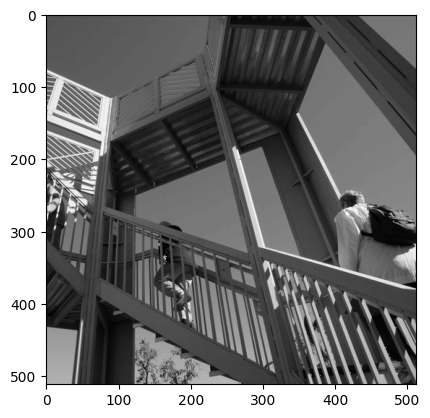

In [5]:
plt.gray()
plt.grid(False)
i = ascent()
plt.imshow(i)

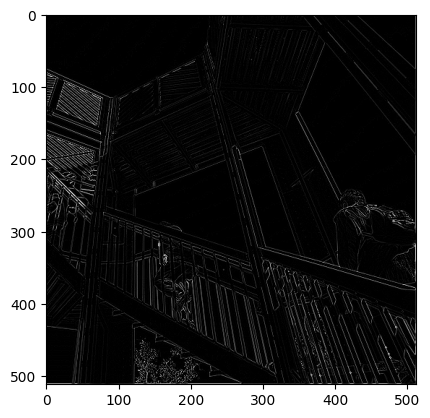

In [4]:
filter = np.array([[0,  1, 0],
                   [1, -4, 1],
                   [0,  1, 0]])
i_tf = transform_img(i, filter)
plt.imshow(i_tf)

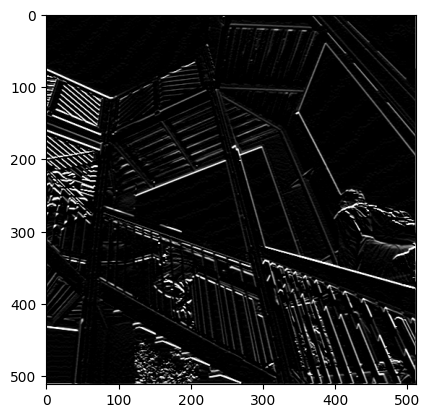

In [6]:
filter_horizontal = np.array([[-1, -2, -1],
                              [ 0,  0,  0],
                              [ 1,  2,  1]])
i_horizontal = transform_img(i, filter_horizontal)
plt.imshow(i_horizontal)

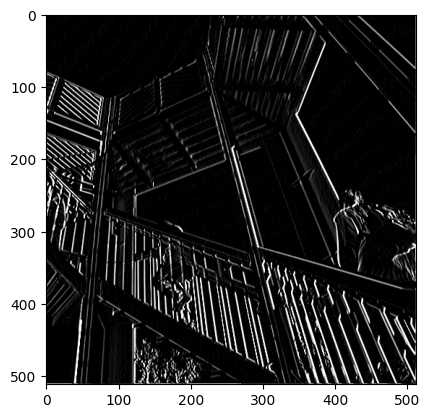

In [7]:
i_vertical = transform_img(i, filter_horizontal.T)
plt.imshow(i_vertical)

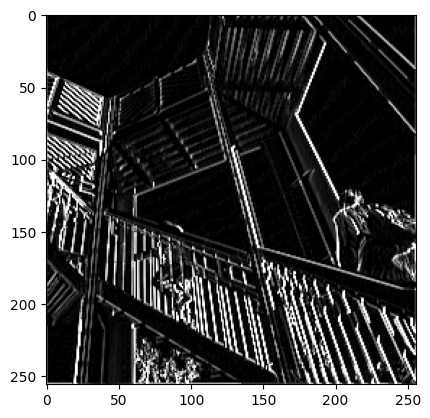

In [8]:
i_v_pooling = maxpooling_2by2(i_vertical)
plt.imshow(i_v_pooling)